In [1]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils

In [2]:
img_width=64; img_height=64
IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/"
TRAIN_CLASSES_PATH = "C:/Projects/VenusDenoise/out_tests/0100_1000-64-train7.csv"
VALID_CLASSES_PATH = "C:/Projects/VenusDenoise/out_tests/train_classes/0100_1000-64-7.csv"

batch_size=16
class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

In [3]:
train_files, train_classes, train_images = \
        dsutils.readDatasetClassification(IMG_PATH, img_width, img_height, radiance_limits, TRAIN_CLASSES_PATH)



Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:8738
Nitid files:8738


In [4]:
val_files, val_classes, val_images = \
    dsutils.readDatasetClassification(IMG_PATH + "validation/", img_width, img_height, radiance_limits, VALID_CLASSES_PATH)


Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2208
Nitid files:2208


In [5]:
train_images = np.reshape(train_images, (len(train_images), img_height, img_width, 1))  
val_images= np.reshape(val_images, (len(val_images), img_height, img_width, 1))  

#train_classes = train_classes.squeeze()
#valid_classes = valid_classes.squeeze()

train_classes= np.reshape(train_classes, (len(train_classes), 1))  
val_classes= np.reshape(val_classes, (len(val_classes), 1))  

In [6]:
train_classes = tf.keras.utils.to_categorical( train_classes, num_classes=None, dtype='float32')
val_classes = tf.keras.utils.to_categorical( val_classes, num_classes=None, dtype='float32')

In [7]:
train_classes.shape


(8738, 4)

In [8]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)), 
    Conv2D(32, (3, 3), activation='relu'), 
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       1

In [9]:
from tensorflow.keras.optimizers import Nadam
model.compile(optimizer=Nadam(learning_rate=0.00001), loss='categorical_crossentropy', metrics =['accuracy'])

In [10]:
hist = model.fit(train_images, train_classes, 
                        epochs=200,
                        batch_size=16, 
                        verbose=1, 
                        validation_data=(val_images, val_classes))


Epoch 1/200
547/547 [==============================] - 18s 20ms/step - loss: 1.1011 - accuracy: 0.5586 - val_loss: 1.4934 - val_accuracy: 0.2812
Epoch 2/200
547/547 [==============================] - 11s 19ms/step - loss: 1.0217 - accuracy: 0.5681 - val_loss: 1.5757 - val_accuracy: 0.3447
Epoch 3/200
547/547 [==============================] - 11s 19ms/step - loss: 0.9408 - accuracy: 0.6210 - val_loss: 1.6042 - val_accuracy: 0.3451
Epoch 4/200
547/547 [==============================] - 11s 19ms/step - loss: 0.9289 - accuracy: 0.6238 - val_loss: 1.6840 - val_accuracy: 0.3573
Epoch 5/200
547/547 [==============================] - 11s 19ms/step - loss: 0.9241 - accuracy: 0.6250 - val_loss: 1.6038 - val_accuracy: 0.3551
Epoch 6/200
547/547 [==============================] - 11s 19ms/step - loss: 0.9210 - accuracy: 0.6267 - val_loss: 1.5955 - val_accuracy: 0.3465
Epoch 7/200
547/547 [==============================] - 11s 19ms/step - loss: 0.9179 - accuracy: 0.6262 - val_loss: 1.7128 - val_ac

547/547 [==============================] - 11s 19ms/step - loss: 0.8923 - accuracy: 0.6377 - val_loss: 1.5990 - val_accuracy: 0.3528
Epoch 58/200
547/547 [==============================] - 11s 19ms/step - loss: 0.8906 - accuracy: 0.6364 - val_loss: 1.7329 - val_accuracy: 0.3265
Epoch 59/200
547/547 [==============================] - 11s 19ms/step - loss: 0.8913 - accuracy: 0.6347 - val_loss: 1.5976 - val_accuracy: 0.3469
Epoch 60/200
547/547 [==============================] - 11s 19ms/step - loss: 0.8909 - accuracy: 0.6365 - val_loss: 1.6110 - val_accuracy: 0.3533
Epoch 61/200
547/547 [==============================] - 11s 19ms/step - loss: 0.8907 - accuracy: 0.6350 - val_loss: 1.6308 - val_accuracy: 0.3505
Epoch 62/200
547/547 [==============================] - 11s 19ms/step - loss: 0.8907 - accuracy: 0.6380 - val_loss: 1.6771 - val_accuracy: 0.3465
Epoch 63/200
547/547 [==============================] - 10s 19ms/step - loss: 0.8906 - accuracy: 0.6363 - val_loss: 1.7044 - val_accuracy

547/547 [==============================] - 10s 19ms/step - loss: 0.8703 - accuracy: 0.6483 - val_loss: 1.7433 - val_accuracy: 0.3451
Epoch 114/200
547/547 [==============================] - 10s 19ms/step - loss: 0.8710 - accuracy: 0.6473 - val_loss: 1.6331 - val_accuracy: 0.3460
Epoch 115/200
547/547 [==============================] - 10s 19ms/step - loss: 0.8699 - accuracy: 0.6469 - val_loss: 1.6305 - val_accuracy: 0.3428
Epoch 116/200
547/547 [==============================] - 10s 19ms/step - loss: 0.8703 - accuracy: 0.6501 - val_loss: 1.6791 - val_accuracy: 0.3573
Epoch 117/200
547/547 [==============================] - 10s 19ms/step - loss: 0.8695 - accuracy: 0.6485 - val_loss: 1.6548 - val_accuracy: 0.3564
Epoch 118/200
547/547 [==============================] - 10s 19ms/step - loss: 0.8679 - accuracy: 0.6482 - val_loss: 1.6954 - val_accuracy: 0.3505
Epoch 119/200
547/547 [==============================] - 10s 19ms/step - loss: 0.8681 - accuracy: 0.6501 - val_loss: 1.6063 - val_ac

547/547 [==============================] - 10s 19ms/step - loss: 0.8383 - accuracy: 0.6582 - val_loss: 1.6469 - val_accuracy: 0.3601
Epoch 169/200
547/547 [==============================] - 10s 19ms/step - loss: 0.8383 - accuracy: 0.6615 - val_loss: 1.7011 - val_accuracy: 0.3537
Epoch 170/200
547/547 [==============================] - 10s 19ms/step - loss: 0.8360 - accuracy: 0.6599 - val_loss: 1.6726 - val_accuracy: 0.3546
Epoch 171/200
547/547 [==============================] - 10s 19ms/step - loss: 0.8371 - accuracy: 0.6579 - val_loss: 1.6445 - val_accuracy: 0.3505
Epoch 172/200
547/547 [==============================] - 10s 19ms/step - loss: 0.8358 - accuracy: 0.6625 - val_loss: 1.6268 - val_accuracy: 0.3505
Epoch 173/200
547/547 [==============================] - 10s 19ms/step - loss: 0.8353 - accuracy: 0.6615 - val_loss: 1.5986 - val_accuracy: 0.3433
Epoch 174/200
547/547 [==============================] - 10s 19ms/step - loss: 0.8339 - accuracy: 0.6626 - val_loss: 1.6963 - val_ac

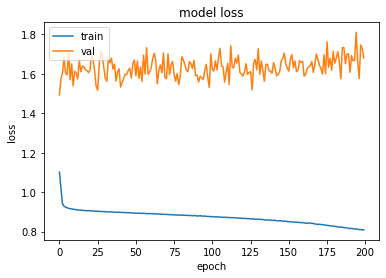

In [11]:
##################
# REPORTS
##################
import ReportsK as reports
reports.plotHistory( hist )

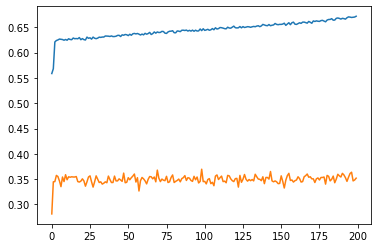

In [13]:
from matplotlib import pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])